In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-menu/starbucks_drinkMenu_expanded.csv
/kaggle/input/starbucks-menu/starbucks-menu-nutrition-drinks.csv
/kaggle/input/starbucks-menu/starbucks-menu-nutrition-food.csv


# 1.Importing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import AgglomerativeClustering

In [3]:
menu = pd.read_csv("/kaggle/input/starbucks-menu/starbucks_drinkMenu_expanded.csv")
menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
menu.shape

(242, 18)

# 2. Preprocessing

In [5]:
menu = menu.replace('Varies', np.nan) 
menu = menu.replace('varies', np.nan) 
menu = menu.dropna(axis=0)

In [6]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          219 non-null    object 
 1   Beverage                   219 non-null    object 
 2   Beverage_prep              219 non-null    object 
 3   Calories                   219 non-null    int64  
 4    Total Fat (g)             219 non-null    object 
 5   Trans Fat (g)              219 non-null    float64
 6   Saturated Fat (g)          219 non-null    float64
 7    Sodium (mg)               219 non-null    int64  
 8    Total Carbohydrates (g)   219 non-null    int64  
 9   Cholesterol (mg)           219 non-null    int64  
 10   Dietary Fibre (g)         219 non-null    int64  
 11   Sugars (g)                219 non-null    int64  
 12   Protein (g)               219 non-null    float64
 13  Vitamin A (% DV)           219 non-null    object 

In [7]:
menu2 = menu.iloc[:,[3,17]]
menu2['Caffeine'] = menu['Caffeine (mg)']
menu2 = menu2.drop('Caffeine (mg)',axis=1)

menu2 = menu2.astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
menu2

,Calories,Caffeine
0,3,175
1,4,260
2,5,330
3,5,410
4,70,75
...,...,...
237,320,0
238,170,0
239,200,0
240,180,0


# 3. Visualization

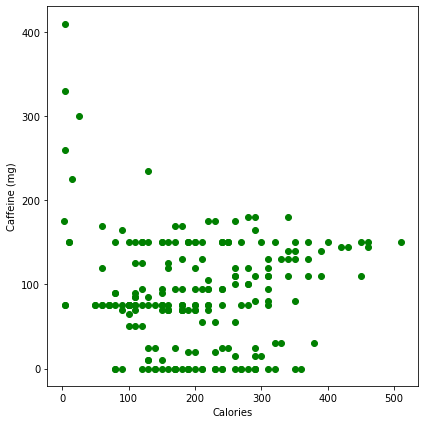

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(menu2['Calories'],menu2['Caffeine'], color='green')
plt.xlabel("Calories")
plt.ylabel("Caffeine (mg)")
plt.tight_layout()
plt.show()

# 4. KMeans

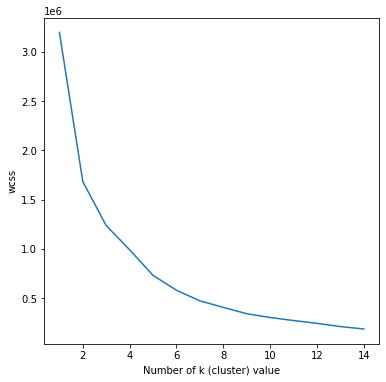

In [10]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(menu2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(1,15),wcss)
plt.xlabel("Number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [11]:
# We can take elbow as 4
kmean2 = KMeans(n_clusters=4)
clusters = kmean2.fit_predict(menu2)

menu2['labels'] = clusters

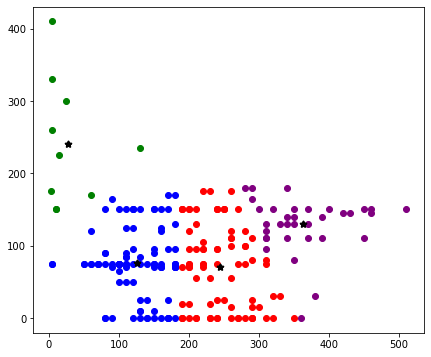

In [12]:
plt.figure(figsize=(7,6))
colors = {0:"red", 1:"blue", 2:"green", 3:"purple"}
for label,color in colors.items():
    plt.scatter(menu2.Calories[menu2.labels == label],
                menu2.Caffeine[menu2.labels == label], color = color)
plt.scatter(kmean2.cluster_centers_[:,0], kmean2.cluster_centers_[:,1],color='black',marker='*',linewidths=2)
plt.show()

# 5. Hierarchial Clustering

In [13]:
menu3 = menu2.iloc[:,menu2.columns != 'labels']

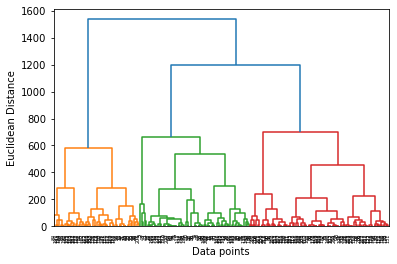

In [14]:
merg = linkage(menu3, method='ward')
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Data points")
plt.ylabel('Euclidean Distance')
plt.show()

In [15]:
hierarc_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clust = hierarc_cluster.fit_predict(menu3)

menu3['labels'] = clust

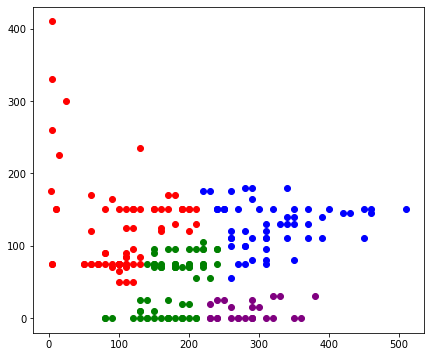

In [16]:
plt.figure(figsize=(7,6))
colors = {0:"red", 1:"blue", 2:"green", 3:"purple"}
for label,color in colors.items():
    plt.scatter(menu3.Calories[menu3.labels == label],
                menu3.Caffeine[menu3.labels == label], color = color)

plt.show()